In [1]:
import pandas as pd

# クレンジングされたデータを読み込む
hittak_map = pd.read_csv('../CleansedFiles/hittak_map.csv')
display(hittak_map.head(5))

,被害者の年齢,被害者の性別,市区町村（発生地）,発生時（始期）,発生年月日（始期）
0,30歳代,女性,大阪市東淀川区,0,9
1,30歳代,女性,大阪市北区,0,1
2,50歳代,男性,大阪市都島区,0,9
3,20歳代,女性,東大阪市,0,6
4,20歳代,女性,東大阪市,0,6


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

sns.set_theme(font_scale=1.5, font='IPAexGothic')
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Axes: xlabel='count', ylabel='発生年月日（始期）'>

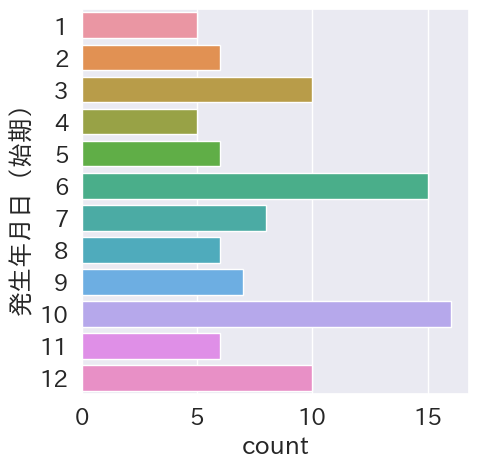

In [3]:
plt.figure(figsize=(5,5))
# plt.tight_layout()
sns.countplot(y=hittak_map['発生年月日（始期）'])

In [4]:
results_path = '../Plots/month_barplot.png'
plt.savefig(results_path)

<Figure size 640x480 with 0 Axes>

In [5]:
# u_list = hittak_map['発生年月日（始期）'].unique()
# print("一意のリスト\n", u_list)
month_1 = hittak_map[hittak_map['発生年月日（始期）'].isin([1])]
month_2 = hittak_map[hittak_map['発生年月日（始期）'].isin([2])]
month_3 = hittak_map[hittak_map['発生年月日（始期）'].isin([3])]
month_4 = hittak_map[hittak_map['発生年月日（始期）'].isin([4])]
month_5 = hittak_map[hittak_map['発生年月日（始期）'].isin([5])]
month_6 = hittak_map[hittak_map['発生年月日（始期）'].isin([6])]
month_7 = hittak_map[hittak_map['発生年月日（始期）'].isin([7])]
month_8 = hittak_map[hittak_map['発生年月日（始期）'].isin([8])]
month_9 = hittak_map[hittak_map['発生年月日（始期）'].isin([9])]
month_10 = hittak_map[hittak_map['発生年月日（始期）'].isin([10])]
month_11 = hittak_map[hittak_map['発生年月日（始期）'].isin([11])]
month_12 = hittak_map[hittak_map['発生年月日（始期）'].isin([12])]
# display(month_12)
# print(len(month_9))

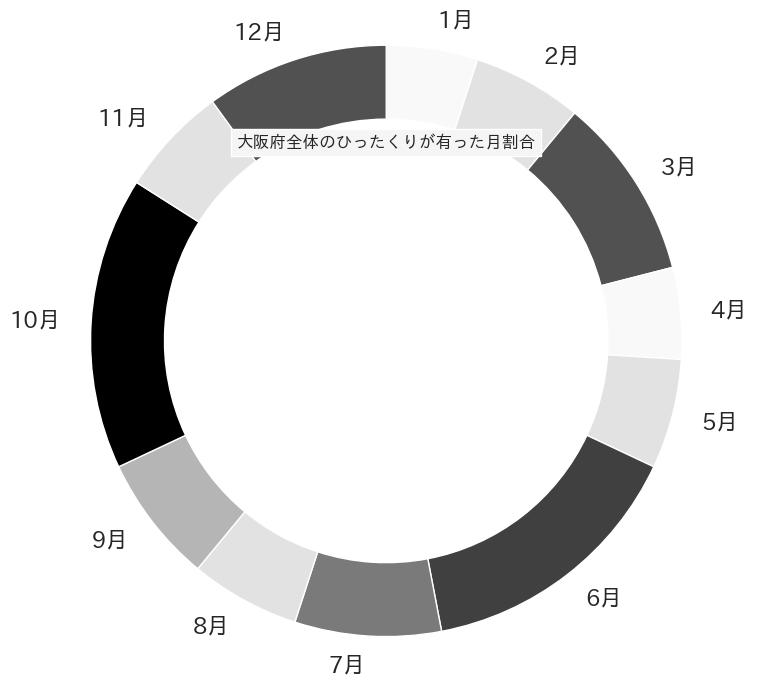

In [6]:
#ドーナツ用データを生成
x = [len(month_1), len(month_2), len(month_3), len(month_4), len(month_5), len(month_6),
     len(month_7), len(month_8), len(month_9), len(month_10), len(month_11), len(month_12)]
labels = ["1月", "2月", "3月", "4月", "5月", "6月", "7月", "8月", "9月", "10月", "11月", "12月"]
 
# カラーマップから色系統を準備
m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12 = [plt.cm.Greys, plt.cm.Greys, plt.cm.Greys,
                                                     plt.cm.Greys, plt.cm.Greys, plt.cm.Greys,
                                                     plt.cm.Greys, plt.cm.Greys, plt.cm.Greys,
                                                     plt.cm.Greys, plt.cm.Greys, plt.cm.Greys]

# 外側のドーナツ作成
colors = [m1(0.05), m2(0.2), m3(0.75), m4(0.05), m5(0.2),
          m6(0.8), m7(0.6), m8(0.2), m9(0.4), m10(1.0), m11(0.2), m12(0.75)]
wedgeprops = {"width":0.5, "edgecolor":'white'}
plt.pie(x, radius=2.0, labels=labels, startangle=90, counterclock=False, colors=colors, wedgeprops= wedgeprops )

# タイトル
plt.title("大阪府全体のひったくりが有った月割合", fontsize=12, bbox={'facecolor':'whitesmoke', 'pad':4})
# plt.tight_layout()
plt.show()

In [7]:
results_path = '../Plots/month_pieplot.png'
plt.savefig(results_path, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

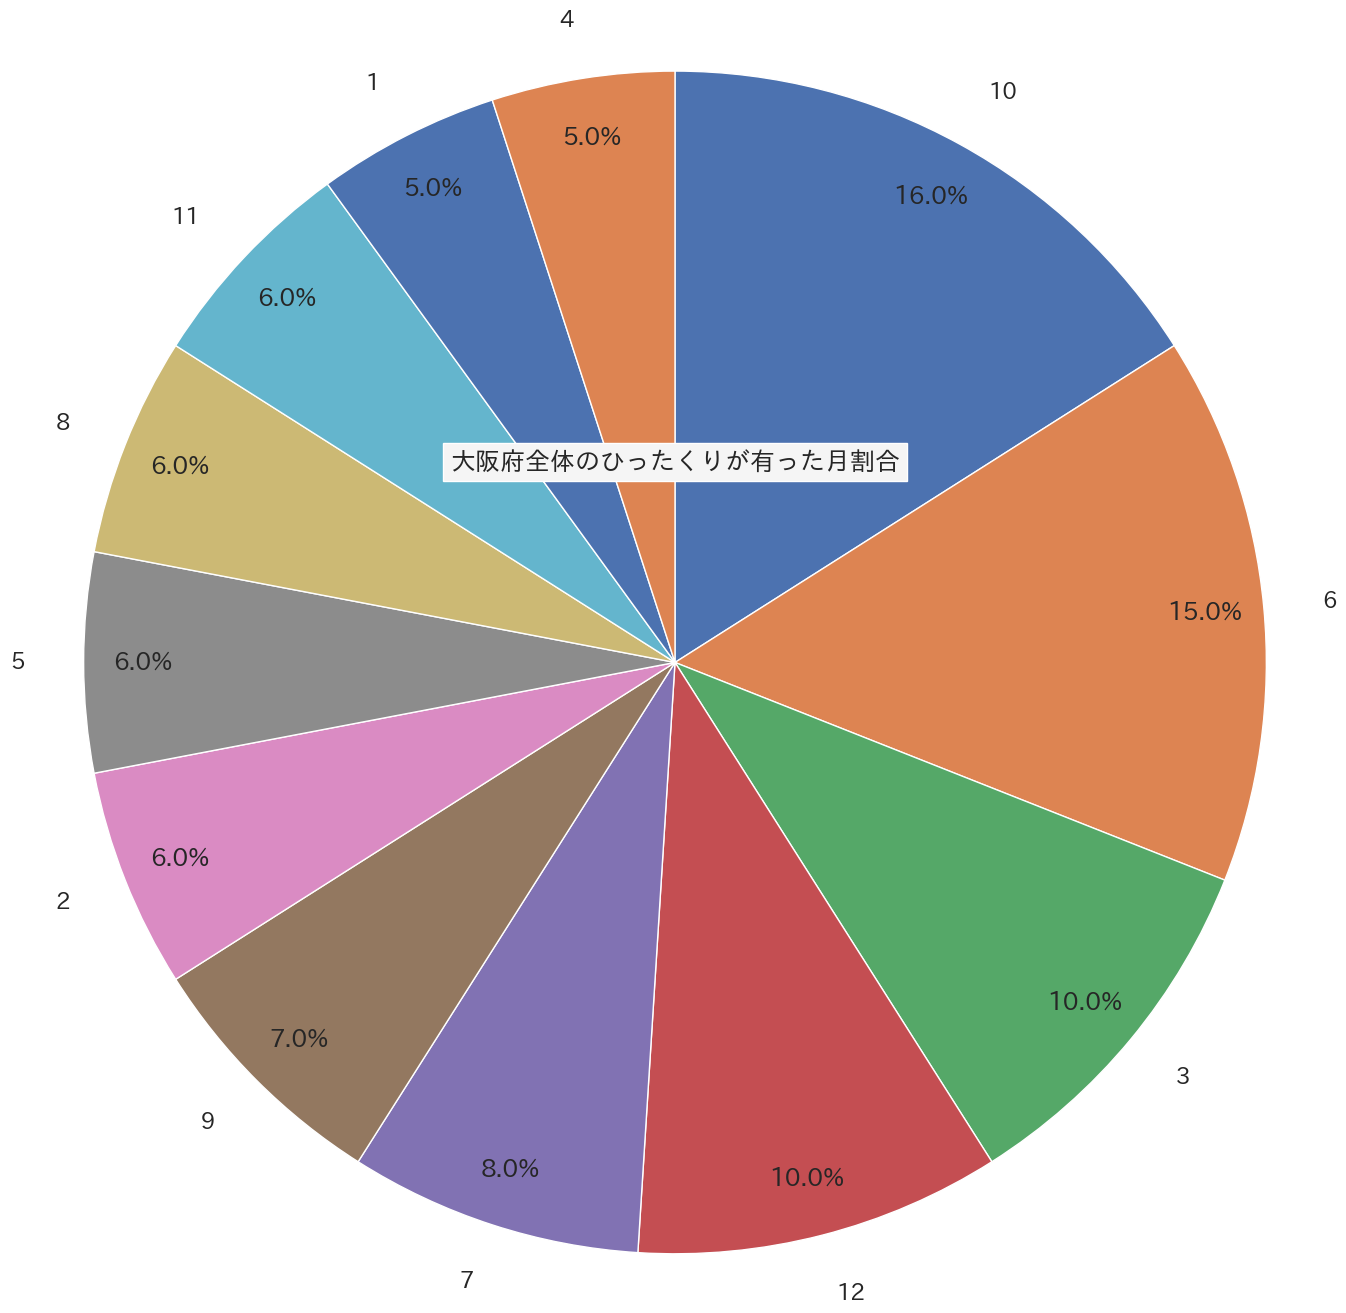

In [8]:
hittak_map['発生年月日（始期）'] = hittak_map['発生年月日（始期）'].astype(str)
hittak_map['発生年月日（始期）'].value_counts().plot.pie(counterclock = False, autopct = '%1.1f%%',
                                                pctdistance=.9, startangle = 90, radius=4)
plt.title("大阪府全体のひったくりが有った月割合", bbox={'facecolor':'whitesmoke', 'pad':5})
# plt.tight_layout()
plt.show()

In [9]:
results_path = '../Plots/month_percent_pieplot.png'
plt.savefig(results_path, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [10]:
# ヒートマップで表すために、カテゴリ型を数値型にget_dymmyで変換する
month_place = pd.get_dummies(hittak_map, columns=['市区町村（発生地）', '発生年月日（始期）'], prefix_sep='/')
print(f'hittak_map : {hittak_map.shape}\n')
# display(month_place.head(5))

# データの形を表示(行数・列数を取得)
# print(f'hittak : {month_place.shape}\n')

# 各columnのデータ型を表示
# print(f'{month_place.dtypes} \n')

hittak_map : (100, 5)



In [11]:
# 見やすい様にカラムの順序を変更する
month_place = month_place.reindex(columns=['発生年月日（始期）/1', '発生年月日（始期）/2', '発生年月日（始期）/3',
                                         '発生年月日（始期）/4', '発生年月日（始期）/5', '発生年月日（始期）/6',
                                         '発生年月日（始期）/7', '発生年月日（始期）/8',
                                         '発生年月日（始期）/9', '発生年月日（始期）/10', '発生年月日（始期）/11',
                                         '発生年月日（始期）/12',
                                         '市区町村（発生地）/大阪市中央区', '市区町村（発生地）/大阪市住吉区',
                                         '市区町村（発生地）/大阪市北区', '市区町村（発生地）/大阪市天王寺区',
                                         '市区町村（発生地）/大阪市旭区',  '市区町村（発生地）/大阪市東住吉区',
                                         '市区町村（発生地）/大阪市東淀川区', '市区町村（発生地）/大阪市浪速区',
                                         '市区町村（発生地）/大阪市淀川区', '市区町村（発生地）/大阪市生野区',
                                         '市区町村（発生地）/大阪市福島区', '市区町村（発生地）/大阪市西成区',
                                         '市区町村（発生地）/大阪市都島区', '市区町村（発生地）/大阪市阿倍野区',
                                         '市区町村（発生地）/守口市', '市区町村（発生地）/寝屋川市',
                                         '市区町村（発生地）/岸和田市', '市区町村（発生地）/東大阪市',
                                         '市区町村（発生地）/枚方市', '市区町村（発生地）/池田市',
                                         '市区町村（発生地）/田尻町', '市区町村（発生地）/茨木市',
                                         '市区町村（発生地）/門真市', '市区町村（発生地）/高槻市',
                                         '市区町村（発生地）/高石市','市区町村（発生地）/八尾市',
                                         '市区町村（発生地）/堺市北区','市区町村（発生地）/堺市堺区',
                                         '市区町村（発生地）/大東市',
                                         '被害者の年齢', '被害者の性別'])

In [12]:
# 発生時間と発生場所の相関性を見る
month_place_corr = month_place.corr()
# month_place_corr

In [13]:
# 見やすい様にカラムの順序を変更する
month_place_corr = month_place_corr.reindex(columns=['市区町村（発生地）/大阪市北区','市区町村（発生地）/大阪市中央区',
                                       '市区町村（発生地）/大阪市福島区', '市区町村（発生地）/大阪市都島区',
                                       '市区町村（発生地）/大阪市淀川区','市区町村（発生地）/大阪市東淀川区',
                                       '市区町村（発生地）/大阪市旭区','市区町村（発生地）/大阪市天王寺区', 
                                       '市区町村（発生地）/大阪市浪速区', '市区町村（発生地）/大阪市阿倍野区',
                                       '市区町村（発生地）/大阪市生野区', '市区町村（発生地）/大阪市西成区',
                                       '市区町村（発生地）/大阪市東住吉区', '市区町村（発生地）/大阪市住吉区',  
                                       '市区町村（発生地）/守口市', '市区町村（発生地）/寝屋川市',
                                       '市区町村（発生地）/大東市','市区町村（発生地）/東大阪市',
                                       '市区町村（発生地）/八尾市',
                                       '市区町村（発生地）/枚方市', '市区町村（発生地）/池田市',
                                       '市区町村（発生地）/田尻町', '市区町村（発生地）/茨木市',
                                       '市区町村（発生地）/門真市', '市区町村（発生地）/高槻市',
                                       '市区町村（発生地）/堺市北区', '市区町村（発生地）/堺市堺区',
                                       '市区町村（発生地）/高石市','市区町村（発生地）/岸和田市'],
                                  index=['発生年月日（始期）/1', '発生年月日（始期）/2', '発生年月日（始期）/3',
                                         '発生年月日（始期）/4', '発生年月日（始期）/5', '発生年月日（始期）/6',
                                         '発生年月日（始期）/7', '発生年月日（始期）/8',
                                         '発生年月日（始期）/9', '発生年月日（始期）/10', '発生年月日（始期）/11',
                                         '発生年月日（始期）/12'
                                         ])

<Axes: >

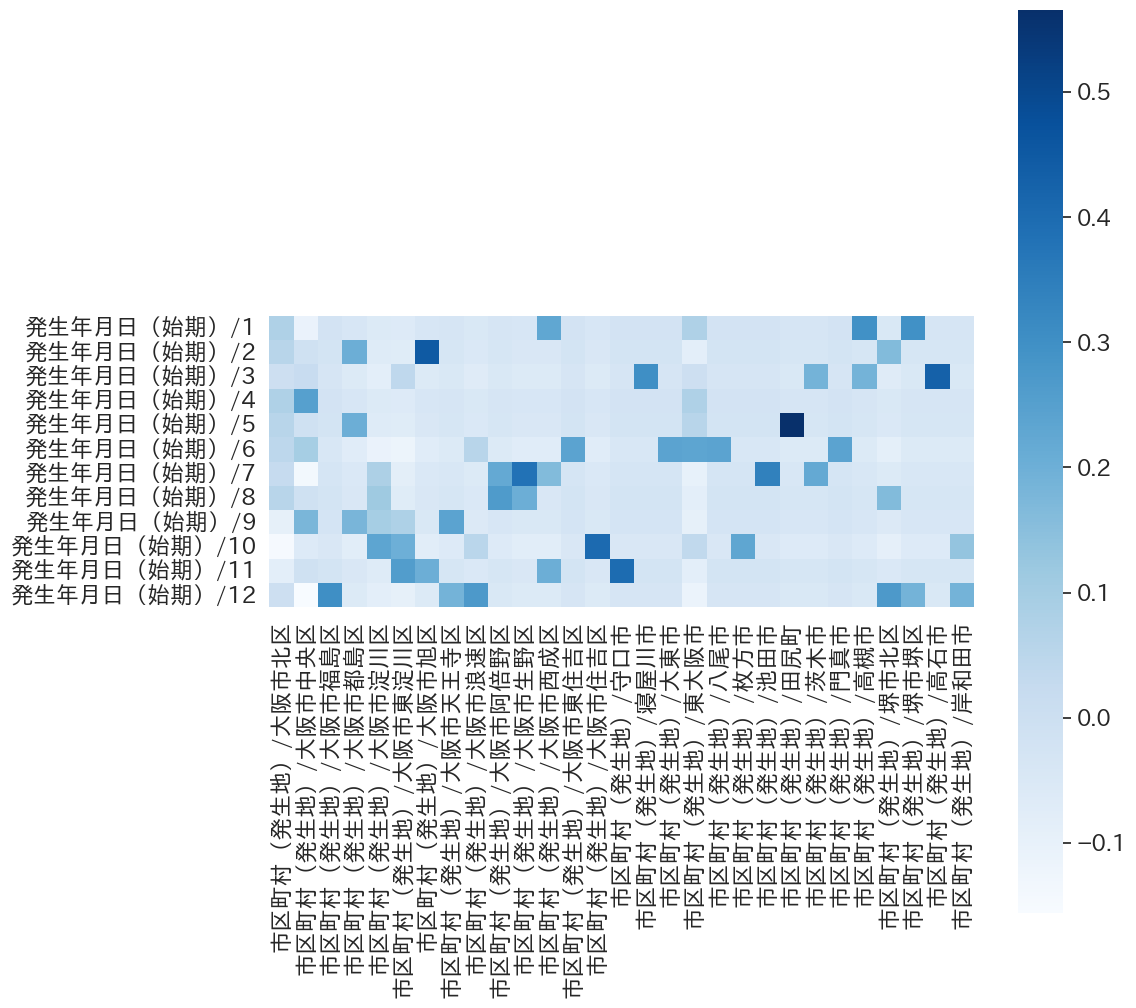

In [14]:
# カラム量が多いため、サイズを見やすく調整
fig, ax = plt.subplots(figsize=(10, 10)) 

# ヒートマップで可視化
plt.tight_layout()
sns.heatmap(month_place_corr, cmap="Blues", square=True)

In [15]:
# results_path = '../Plots/month_place_heatmap.png'
# fig.savefig(results_path, bbox_inches='tight')

In [16]:
# ヒートマップで表すために、数値型になっている時間をカテゴリ化させる
hittak_map['発生時（始期）'] = hittak_map['発生時（始期）'].astype(str)

# 各columnのデータ型を表示
print(f'{hittak_map.dtypes} \n')

被害者の年齢       object
被害者の性別       object
市区町村（発生地）    object
発生時（始期）      object
発生年月日（始期）    object
dtype: object 



In [17]:
# ヒートマップで表すために、カテゴリ型を数値型にget_dymmyで変換する
time_month = pd.get_dummies(hittak_map, columns=['発生年月日（始期）', '発生時（始期）'], prefix_sep='/')

# データの形を表示(行数・列数を取得)
print(f'time_month : {time_month.shape}\n')

# 各columnのデータ型を表示
print(f'{time_month.dtypes} \n')

time_month : (100, 36)

被害者の年齢          object
被害者の性別          object
市区町村（発生地）       object
発生年月日（始期）/1      uint8
発生年月日（始期）/10     uint8
発生年月日（始期）/11     uint8
発生年月日（始期）/12     uint8
発生年月日（始期）/2      uint8
発生年月日（始期）/3      uint8
発生年月日（始期）/4      uint8
発生年月日（始期）/5      uint8
発生年月日（始期）/6      uint8
発生年月日（始期）/7      uint8
発生年月日（始期）/8      uint8
発生年月日（始期）/9      uint8
発生時（始期）/0        uint8
発生時（始期）/1        uint8
発生時（始期）/10       uint8
発生時（始期）/11       uint8
発生時（始期）/12       uint8
発生時（始期）/13       uint8
発生時（始期）/14       uint8
発生時（始期）/15       uint8
発生時（始期）/16       uint8
発生時（始期）/17       uint8
発生時（始期）/18       uint8
発生時（始期）/19       uint8
発生時（始期）/2        uint8
発生時（始期）/20       uint8
発生時（始期）/21       uint8
発生時（始期）/22       uint8
発生時（始期）/23       uint8
発生時（始期）/3        uint8
発生時（始期）/4        uint8
発生時（始期）/5        uint8
発生時（始期）/9        uint8
dtype: object 



In [18]:
# 見やすい様にカラムの順序を変更する
time_month = time_month.reindex(columns=['発生年月日（始期）/1', '発生年月日（始期）/2', '発生年月日（始期）/3',
                                         '発生年月日（始期）/4', '発生年月日（始期）/5', '発生年月日（始期）/6',
                                         '発生年月日（始期）/7', '発生年月日（始期）/8',
                                         '発生年月日（始期）/9', '発生年月日（始期）/10', '発生年月日（始期）/11',
                                         '発生年月日（始期）/12',
                                         '発生時（始期）/0', '発生時（始期）/1', '発生時（始期）/2',
                                         '発生時（始期）/3', '発生時（始期）/4', '発生時（始期）/5',
                                         '発生時（始期）/9', '発生時（始期）/10', '発生時（始期）/11',
                                         '発生時（始期）/12', '発生時（始期）/13', '発生時（始期）/14',
                                         '発生時（始期）/15', '発生時（始期）/16', '発生時（始期）/17',
                                         '発生時（始期）/18', '発生時（始期）/19', '発生時（始期）/20',
                                         '発生時（始期）/21', '発生時（始期）/22', '発生時（始期）/23',
                                         '被害者の年齢', '被害者の性別', '市区町村（発生地）'])

In [19]:
# 発生時間と発生場所の相関性を見る
time_month_corr = time_month.corr()
# time_month_corr

In [20]:
# 見やすい様にカラムの順序を変更する
time_month_corr = time_month_corr.reindex(columns=['発生時（始期）/0', '発生時（始期）/1', '発生時（始期）/2',
                                         '発生時（始期）/3', '発生時（始期）/4', '発生時（始期）/5',
                                         '発生時（始期）/9', '発生時（始期）/10', '発生時（始期）/11',
                                         '発生時（始期）/12', '発生時（始期）/13', '発生時（始期）/14',
                                         '発生時（始期）/15', '発生時（始期）/16', '発生時（始期）/17',
                                         '発生時（始期）/18', '発生時（始期）/19', '発生時（始期）/20',
                                         '発生時（始期）/21', '発生時（始期）/22', '発生時（始期）/23'],
                                index=['発生年月日（始期）/1', '発生年月日（始期）/2', '発生年月日（始期）/3',
                                         '発生年月日（始期）/4', '発生年月日（始期）/5', '発生年月日（始期）/6',
                                         '発生年月日（始期）/7', '発生年月日（始期）/8',
                                         '発生年月日（始期）/9', '発生年月日（始期）/10', '発生年月日（始期）/11',
                                         '発生年月日（始期）/12'])

<Axes: >

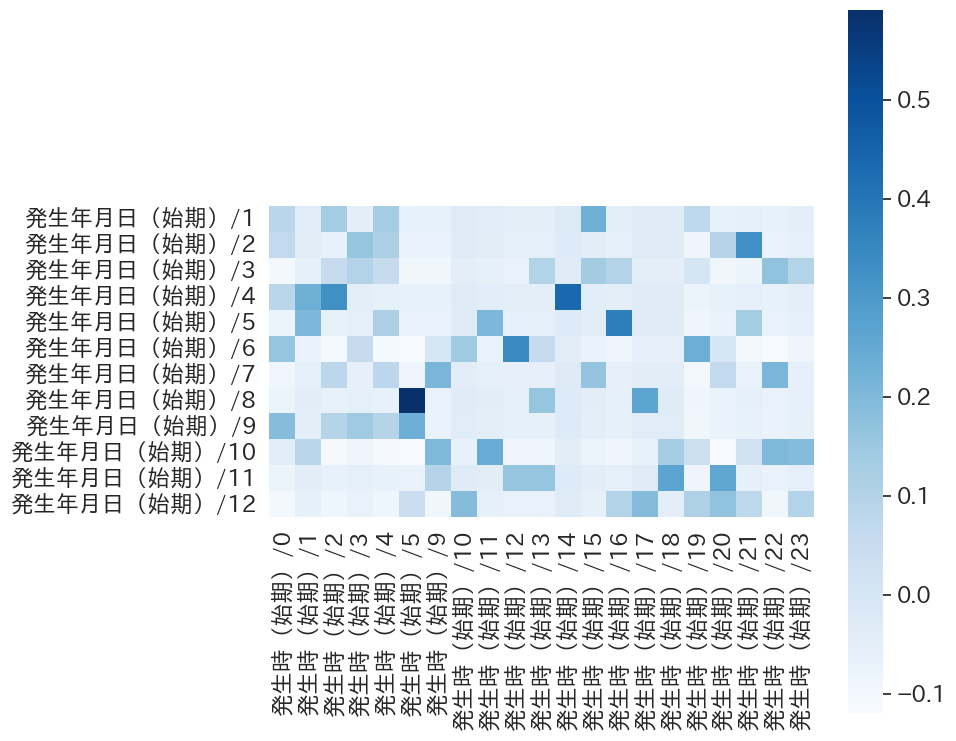

In [21]:
# カラム量が多いため、サイズを見やすく調整
fig, ax = plt.subplots(figsize=(8, 8)) 

# ヒートマップで可視化
plt.tight_layout()
sns.heatmap(time_month_corr, cmap="Blues", square=True)

In [22]:
# results_path = '../Plots/month_time_heatmap.png'
# fig.savefig(results_path, bbox_inches='tight')